# Data Preprocessing(tiền sử lý dữ liệu)
* là quá trình chuẩn bị và biến đổi dữ liệu thô để làm cho chúng phù hợp với mô hình học máy. Quá trình này bao gồm các bước như:

* Tách dữ liệu: tách dữ liệu thành tập huấn luyện và tập kiểm tra hoặc tập validation.

* Xử lý các giá trị thiếu: kiểm tra và xử lý các giá trị NaN hoặc null trong dữ liệu.

* Chuẩn hóa dữ liệu: biến đổi các giá trị của các tính năng thành các giá trị nằm trong khoảng cụ thể, như chuẩn hóa Min-Max, chuẩn hóa z-score...

* Biến đổi dữ liệu: tạo ra các tính năng mới từ dữ liệu hiện có, như biến đổi logarit, biến đổi phân loại...

* Loại bỏ tính năng không cần thiết: loại bỏ các tính năng không cần thiết hoặc không có giá trị cho mô hình.

* Mã hóa dữ liệu: mã hóa các giá trị phân loại thành các số nguyên hoặc các vector đặc trưng.

* Các bước này giúp cho dữ liệu trở nên đầy đủ, chính xác và phù hợp với mô hình học máy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('Data-for-Scikit-Learn.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [11]:
print(dataset)
#print(X)
#print(y)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


# Data Imputation (Missing Data Replacement)
* Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.
* Data imputation là quá trình điền giá trị vào các vị trí dữ liệu bị thiếu (missing values) trong tập dữ liệu. Trong thực tế, các tập dữ liệu thường chứa các giá trị bị thiếu do nhiều nguyên nhân khác nhau như lỗi do đo đạc, dữ liệu không được cập nhật đầy đủ, hoặc do sự thiếu sót của người dùng trong việc cung cấp thông tin.

* Việc xử lý dữ liệu bị thiếu là một bước quan trọng trong việc tiền xử lý dữ liệu (data preprocessing), vì dữ liệu bị thiếu có thể ảnh hưởng đến chất lượng của mô hình học máy hoặc khai phá dữ liệu (data mining) được xây dựng từ tập dữ liệu đó.

* Các phương pháp data imputation thường được sử dụng bao gồm điền giá trị trung bình, giá trị mode (giá trị xuất hiện nhiều nhất), giá trị median (giá trị ở giữa), hoặc sử dụng các mô hình học máy để dự đoán giá trị bị thiếu dựa trên các giá trị khác trong tập dữ liệu.

In [12]:
for i in range(len(dataset.columns)):
    missing_data = dataset[dataset.columns[i]].isna().sum()
    perc = missing_data / len(dataset) * 100 #(missing_data/tổng hàng * 100 để làm tròn lên 100)
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))


>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 1, percentage 10.00
>2,  missing entries: 1, percentage 10.00
>3,  missing entries: 0, percentage 0.00


In [13]:
for i in dataset.columns:
    missing_data = dataset[i].isna().sum() #isna() được sử dụng để kiểm tra giá trị NaN (not a number) trong dataframe.
    perc = missing_data / len(dataset) * 100 #(missing_data/tổng hàng * 100 để làm tròn lên 100)
    print(f"Column: {i} has {perc}%")

Column: Country has 0.0%
Column: Age has 10.0%
Column: Salary has 10.0%
Column: Purchased has 0.0%


In [14]:
# test
for i in range(len(dataset.columns)):
    print(dataset[dataset.columns[i]].isna())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Country, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: Age, dtype: bool
0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: Salary, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Purchased, dtype: bool


<Axes: >

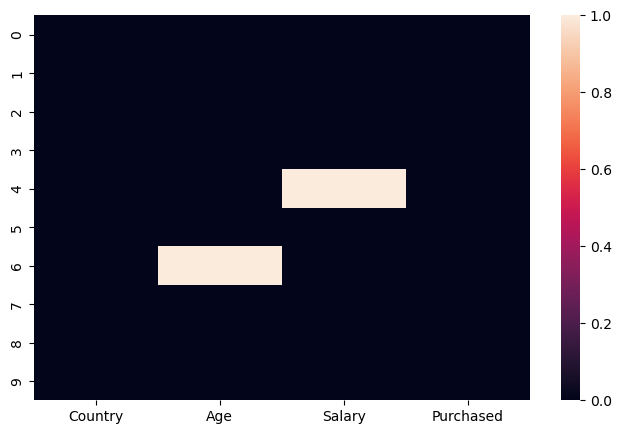

In [15]:
fix, ax = plt.subplots(figsize=(8,5))
sns.heatmap(dataset.isna()) #isna() được sử dụng để kiểm tra giá trị NaN (not a number) trong dataframe.

<Axes: >

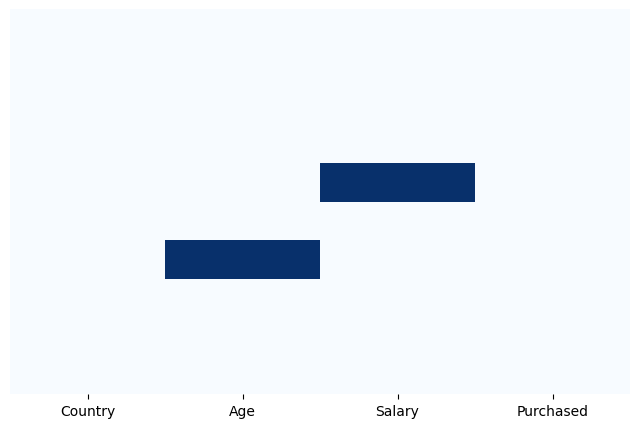

In [16]:
# sao khi chỉnh lại xíu 
fix, ax = plt.subplots(figsize=(8,5))
sns.heatmap(dataset.isna(), cmap="Blues",yticklabels=False, cbar=False, )

In [4]:
 dataset.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
#convert the dataframe into a numpy array by calling values on my dataframe (not necessary), but a habit I prefer
X= dataset.iloc[:, :-1].values #lấy tất cả hàng còn cột bỏ cột cuối
y = dataset.iloc[:, -1].values # lấy tất cà hàng và chỉ lấy cột cuối

#values là để chuyển sang dạng numpy

In [8]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [20]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [21]:
from sklearn.impute import SimpleImputer

#Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Replace missing value from numerical Col 1 'Age', Col 2 'Salary'
#fit on the dataset to calculate the statistic for each column
imputer.fit(X[:, 1:3]) # 1:3 là chỉ lấy Age và Salary

#The fit imputer is then applied to the dataset 
# to create a copy of the dataset with all the missing values 
# for each column replaced with the calculated mean statistic.
#transform will replace & return the new updated columns
X[:, 1:3] = imputer.transform(X[:, 1:3]) 

In [22]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data

### Encode Independent variable (X)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: specify what kind of transformation, and which cols
#Tuple ('encoder' encoding transformation, instance of Class OneHotEncoder, [col to transform])
#remainder ="passthrough" > to keep the cols which not be transformed. Otherwise, the remaining cols will not be included 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])] , remainder="passthrough" )
#fit and transform with input = X
#np.array: need to convert output of fit_transform() from matrix to np.array
X = np.array(ct.fit_transform(X))

"""Code này sử dụng module ColumnTransformer và OneHotEncoder của thư viện Scikit-learn (sklearn)
để chuyển đổi dữ liệu từ dạng dữ liệu không số sang dạng dữ liệu số.

Trước khi chuyển đổi dữ liệu, dữ liệu được lưu trữ trong biến X dưới dạng một mảng đa chiều (nhiều hàng và nhiều cột).
Cột đầu tiên trong mảng X chứa dữ liệu không số (ví dụ: chuỗi), các cột tiếp theo chứa dữ liệu số.

Để chuyển đổi dữ liệu không số thành dạng số, module ColumnTransformer được sử dụng để chỉ định loại
chuyển đổi và cột dữ liệu được áp dụng chuyển đổi.

Trong đoạn code này, loại chuyển đổi được chỉ định là OneHotEncoder (một loại chuyển đổi phổ biến trong Machine Learning), 
và cột dữ liệu được áp dụng chuyển đổi là cột đầu tiên của mảng X (cột chứa dữ liệu không số).

Sau khi xác định được loại chuyển đổi và cột dữ liệu được áp dụng chuyển đổi,
hàm fit_transform() của ColumnTransformer được sử dụng để thực hiện việc chuyển đổi dữ liệu. 
Kết quả đầu ra của fit_transform() là một ma trận chứa dữ liệu đã được chuyển đổi,
và biến X được gán lại với kết quả đầu ra này.

Cuối cùng, biến X được chuyển đổi sang dạng mảng NumPy để sử dụng cho các mô hình Machine Learning."""

In [26]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable

In [27]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
y = le.fit_transform(y)

In [29]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#X_train gồm 80% dữ liệu x - y_train nhãn tương ứng
#X_test gồm 20% dữ liệu x - y_test nhãn tương ứng


In [32]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [33]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [34]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [35]:
y_test

array([0, 1])

In [36]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])


"""sc = StandardScaler(): Khởi tạo một StandardScaler object.
X_train[:,3:] = sc.fit_transform(X_train[:,3:]): Dùng fit_transform method của StandardScaler để thực hiện chuẩn hoá cho các giá trị từ cột 3 trở đi của tập dữ liệu huấn luyện X_train. Trong đó:
sc.fit_transform(): Chạy trên tập dữ liệu huấn luyện để tính toán giá trị trung bình và độ lệch chuẩn để chuẩn hoá dữ liệu, và thực hiện chuẩn hoá luôn.
X_train[:,3:]: Lấy các cột từ cột thứ 3 đến hết của X_train.
X_test[:,3:] = sc.transform(X_test[:,3:]): Dùng transform method của StandardScaler để thực hiện chuẩn hoá cho các giá trị từ cột 3 trở đi của tập dữ liệu kiểm tra X_test. Trong đó:
sc.transform(): Sử dụng giá trị trung bình và độ lệch chuẩn đã được tính toán trên tập dữ liệu huấn luyện để chuẩn hoá dữ liệu, và thực hiện chuẩn hoá luôn.
X_test[:,3:]: Lấy các cột từ cột thứ 3 đến hết của X_test. Chú ý rằng, chỉ sử dụng method transform mà không dùng fit để tính toán giá trị trung bình và độ lệch chuẩn mới là cách đảm bảo rằng tập kiểm tra được chuẩn hoá theo cùng một chuẩn với tập huấn luyện."""

In [38]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [39]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)

# Training Machine Learning Model


* Goal: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = pd.read_csv("train.csv", index_col = "Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns #liệt kê các tên cột 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Feature Selection
* -choose Feature to train ML Model

In [5]:
features = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]

### Spltting dataset into X and y

In [6]:
X = data[features]
Y = data["SalePrice"]

In [7]:
X.head(100)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
96,9765,1993,680,790,2,3,6
97,10264,1999,1588,0,2,3,6
98,10921,1965,960,0,1,3,6


In [8]:
Y.head(100)

Id
1      208500
2      181500
3      223500
4      140000
5      250000
        ...  
96     185000
97     214000
98      94750
99      83000
100    128950
Name: SalePrice, Length: 100, dtype: int64

#### X_train, X_test, y_train, y_test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)


In [10]:
X_train.shape # 80% của hàng

(1168, 7)

In [11]:
X_valid.shape # 20% còn lại của hàng

(292, 7)

In [12]:
data.shape # tổng

(1460, 80)

In [13]:
X.shape # tổng

(1460, 7)

## chú ý tới lúc train ML
*"""DecisionTreeRegressor là một model thuộc loại Decision Tree (Cây Quyết Định)
được sử dụng trong bài toán hồi quy (regression).
Model này sẽ học cách xây dựng một cây quyết định dựa trên các thuộc tính đầu vào của dữ liệu và đầu ra (target)tương ứng với mỗi điểm dữ liệu. 
Cây quyết định này sẽ được sử dụng để dự đoán giá trị đầu ra của các điểm dữ liệu mới dựa trên thuộc tính đầu vào. 
Model này có thể được sử dụng để giải quyết các bài toán liên quan đến dự đoán giá nhà,dự đoán doanh thu của một cửa hàng, v.v."""

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)


In [15]:
#Fit tranining data into model
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

In [16]:
y_preds=dt_model.predict(X_valid.head())
#.head() cho y_preds print ra 5 phần tử thui
"""Trong Machine Learning, chúng ta sử dụng mô hình để dự đoán giá trị đầu ra cho các điểm dữ liệu mới.
Hàm predict trong thư viện scikit-learn được sử dụng để thực hiện việc dự đoán này, 
bằng cách truyền vào dữ liệu đầu vào và mô hình đã được huấn luyện trước đó.
Kết quả trả về là một mảng các giá trị dự đoán cho các điểm dữ liệu đầu vào tương ứng."""

'Trong Machine Learning, chúng ta sử dụng mô hình để dự đoán giá trị đầu ra cho các điểm dữ liệu mới.\nHàm predict trong thư viện scikit-learn được sử dụng để thực hiện việc dự đoán này, \nbằng cách truyền vào dữ liệu đầu vào và mô hình đã được huấn luyện trước đó.\nKết quả trả về là một mảng các giá trị dự đoán cho các điểm dữ liệu đầu vào tương ứng.'

In [17]:
y_preds

array([335000., 140200., 119000., 207500., 112000.])

In [18]:
pd.DataFrame({'Y':Y_valid.head(), 'y_preds':y_preds})
# kiểm tra giá trị thật và giá trị dự đoná có trên lệt nhiều k

,Y,y_preds
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0


In [19]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=1)

In [20]:
rf_val_preds = rf_model.predict(X_valid)
rf_val_preds

array([271690.        , 155039.        , 122024.        , 188915.        ,
        91147.        ,  88533.2       , 240518.24      , 126286.        ,
       624269.12      , 174312.25333333, 209138.46      , 147714.5       ,
       233088.25      , 123139.5       , 140503.75      , 139187.        ,
       232538.3       , 134260.        , 145952.24      , 130562.05      ,
       129304.53      , 147179.68333333, 112355.46      , 183320.22      ,
       153926.5       , 182853.57      , 176891.        ,  86320.        ,
       308784.98      , 112746.        , 141734.5       , 190094.        ,
       124460.65      , 280081.94      , 317780.6       , 179756.65      ,
       218512.64      , 118609.16      , 224329.28      , 304517.56      ,
       229449.        , 141422.15333333, 186872.35      , 302902.86      ,
       316105.83      , 139820.        , 105783.66      , 127933.25      ,
       165361.5       , 118615.5       , 314806.34      , 145952.75      ,
       168104.74      , 1

In [21]:
rf_val_preds[:5]

array([271690., 155039., 122024., 188915.,  91147.])

## Predict with a new input

In [22]:
X_valid.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
530,32668,1957,2515,0,3,4,9
492,9490,1941,958,620,1,3,5
460,7015,1950,979,224,1,3,5
280,10005,1977,1156,866,2,4,8
656,1680,1971,525,567,1,3,6


In [25]:
rf_model.predict([[9838,1992,542,555,3,2,7]])

D:\DATA_SCIENCE\IDE\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([166442.33])

In [29]:
import numpy as np

# Tạo một numpy array chứa thông tin về căn nhà mới
# Ví dụ: diện tích = 150m2, năm xây dựng = 2010, số phòng ngủ = 3, số phòng vệ sinh = 2,
# khu vực = 1 (Thành phố Hồ Chí Minh), loại hình căn hộ = 2 (căn hộ cao cấp),
# trang thiết bị = 4 (đầy đủ nội thất), hướng nhà = 3 (Đông Nam)
new_house = np.array([[150, 2010, 3, 2, 1, 2, 3]])

# Dự đoán giá nhà mới sử dụng mô hình rf_model
predicted_price = rf_model.predict(new_house)

# In kết quả dự đoán giá nhà mới
print("Giá nhà dự đoán: ", predicted_price)


Giá nhà dự đoán:  [142455.70752381]


D:\DATA_SCIENCE\IDE\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
X_input = []


sqft = float(input("LotArea: "))
X_input.append(sqft)

# Yêu cầu người dùng nhập năm xây dựng
yr_built = int(input("YearBuilt: "))
X_input.append(yr_built)


One = int(input("1stFlrSF: "))
X_input.append(One)


TowOne = float(input("2ndFlrSF: "))
X_input.append(TowOne)


F = int(input("FullBath: "))
X_input.append(F)


B = int(input("BedroomAbvGr: "))
X_input.append(B)


T = int(input("TotRmsAbvGrd: "))
X_input.append(T)

# Sử dụng mô hình để dự đoán giá nhà
price = rf_model.predict([X_input])

# Hiển thị kết quả dự đoán giá nhà
print("Giá nhà dự đoán: ${:,.2f}".format(price[0]))


LotArea9000
YearBuilt: 1000
1stFlrSF: 542
2ndFlrSF: 555
FullBath: 6
BedroomAbvGr: 4
TotRmsAbvGrd: 8
Giá nhà dự đoán: $89,579.00


D:\DATA_SCIENCE\IDE\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
